In [9]:
from tools import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from scipy import interpolate
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('expand_frame_repr', False)
qa = pd.read_csv('QA_metadata_tabDelimited.txt', sep = "\t")
simplified = qa[['ProcessDataID', 'CodeName', 'cathodeMass']]
simplified = simplified.dropna()

In [10]:
path_list = path_listing(r'C:\Users\cjang.WILDCAT\Desktop\data_driven\CJ_work')
ids = []
for i in path_list:
    up1 = i.strip('ProcessDataID_')
    no = up1.strip('_tabDelimited.txt')
    ids.append(float(no))
    print(float(no))

ProcessDataID_184982_tabDelimited.txt
ProcessDataID_184985_tabDelimited.txt
ProcessDataID_184988_tabDelimited.txt
ProcessDataID_184991_tabDelimited.txt
ProcessDataID_184994_tabDelimited.txt
ProcessDataID_184997_tabDelimited.txt
ProcessDataID_185000_tabDelimited.txt
ProcessDataID_185003_tabDelimited.txt
ProcessDataID_185006_tabDelimited.txt
ProcessDataID_185009_tabDelimited.txt
ProcessDataID_185012_tabDelimited.txt
ProcessDataID_185015_tabDelimited.txt
ProcessDataID_185018_tabDelimited.txt
ProcessDataID_185021_tabDelimited.txt
ProcessDataID_185024_tabDelimited.txt
ProcessDataID_185027_tabDelimited.txt
184982.0
184985.0
184988.0
184991.0
184994.0
184997.0
185000.0
185003.0
185006.0
185009.0
185012.0
185015.0
185018.0
185021.0
185024.0
185027.0


In [11]:
def interp(inpt):
    df = pd.read_csv(inpt, sep = "\t")
    i = list(simplified['ProcessDataID'])
    df['cathodeMass'] = np.ones(len(df)) * simplified.iloc[i.index(df['ProcessDataID'][1])].cathodeMass
    df['divided'] = df['StateCapacity_mAh']/df['cathodeMass']
    df = df[['ProcessDataID', 'StepNumber', 'Cycle', 'Step','State', 'Voltage_V', 'cathodeMass', 'StateCapacity_mAh', 'divided']]
    df = df[df['Step'] == "ApplyCurrent"]
    cycle_ten = df[df['Cycle'] == 10]
    cycle_hun = df[df['Cycle'] == 100]

    tenth_dis = cycle_ten[(cycle_ten['State'] == 'Discharge')]
    tenth_charge = cycle_ten[(cycle_ten['State'] == 'Charge')]

    hundth_dis = cycle_hun[(cycle_hun['State'] == 'Discharge')]
    hundth_charge = cycle_hun[(cycle_hun['State'] == 'Charge')]

    figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

    fp = tenth_dis['divided']
    xp = tenth_dis['Voltage_V']
    new_vals = hundth_dis['Voltage_V']
    f = interpolate.interp1d(xp,fp,fill_value='extrapolate')
    hundth_dis['interp_divided'] = list(f(new_vals))
    hundth_dis['difference'] = abs(hundth_dis['divided'] - hundth_dis['interp_divided'])

    fpc = tenth_charge['divided']
    xpc = tenth_charge['Voltage_V']
    new_valsc = hundth_charge['Voltage_V']
    fc = interpolate.interp1d(xpc,fpc,fill_value='extrapolate')
    hundth_charge['interp_divided'] = list(fc(new_valsc))
    hundth_charge['difference'] = abs(hundth_charge['divided'] - hundth_charge['interp_divided'])

    plt.plot(hundth_charge['Voltage_V'], hundth_charge['difference'])
    plt.plot(hundth_dis['Voltage_V'], hundth_dis['difference'])

    #plt.plot(hundth_charge['Voltage_V'], hundth_charge['divided'])
    #plt.plot(hundth_dis['Voltage_V'], hundth_dis['divided'])

    #plt.plot(tenth_charge['Voltage_V'], tenth_charge['divided'])
    #plt.plot(tenth_dis['Voltage_V'], tenth_dis['divided'])

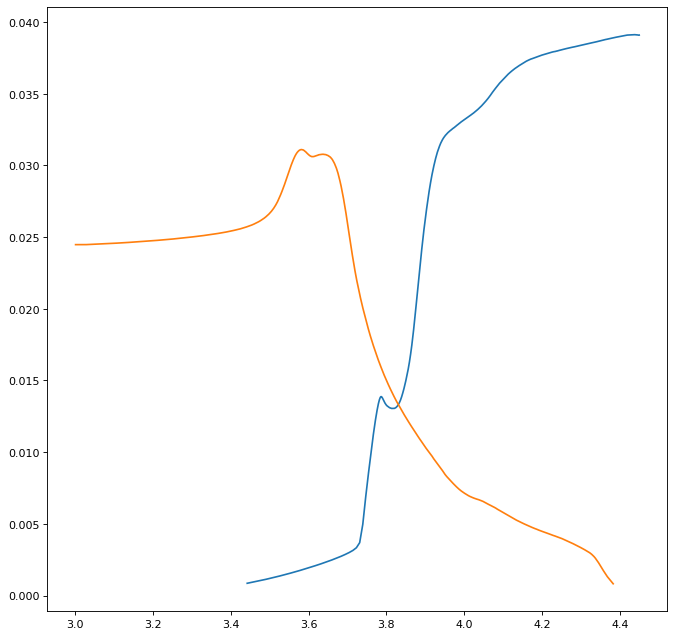

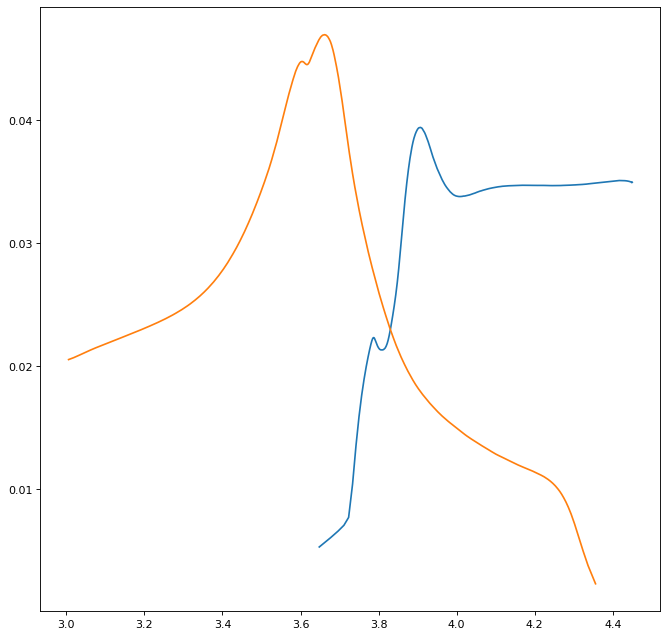

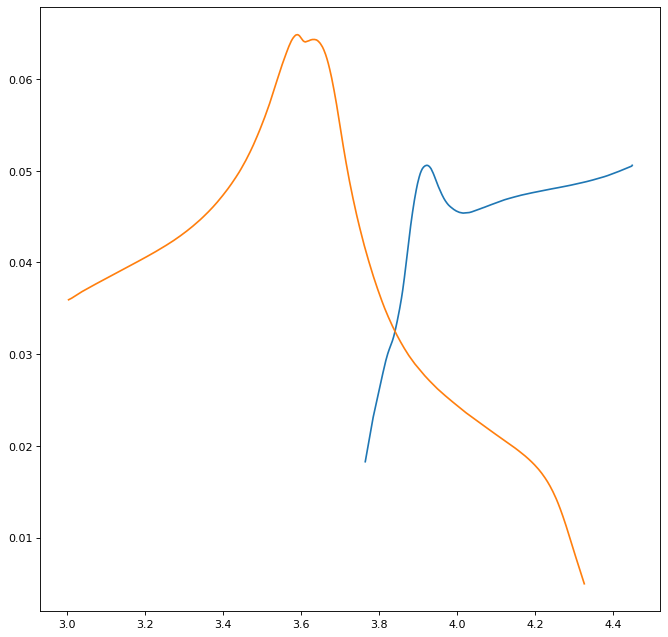

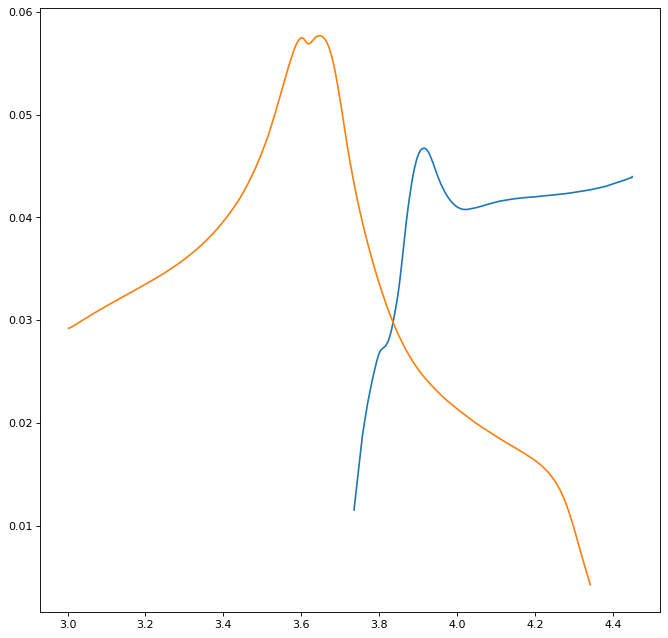

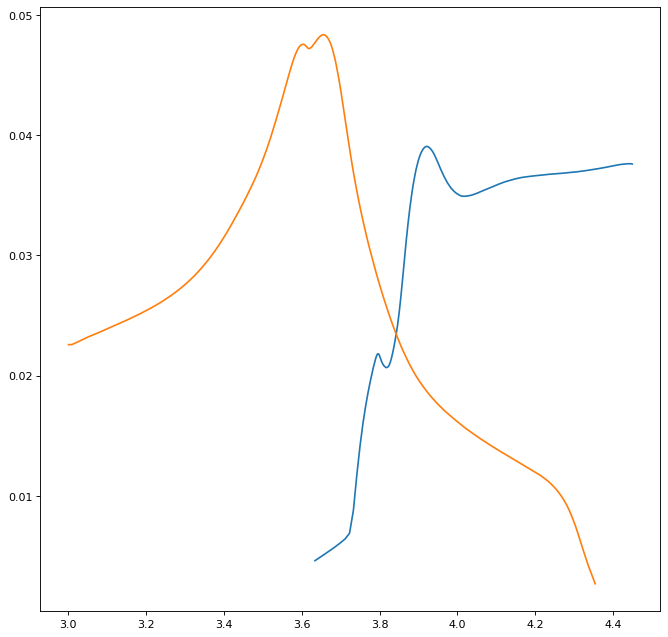

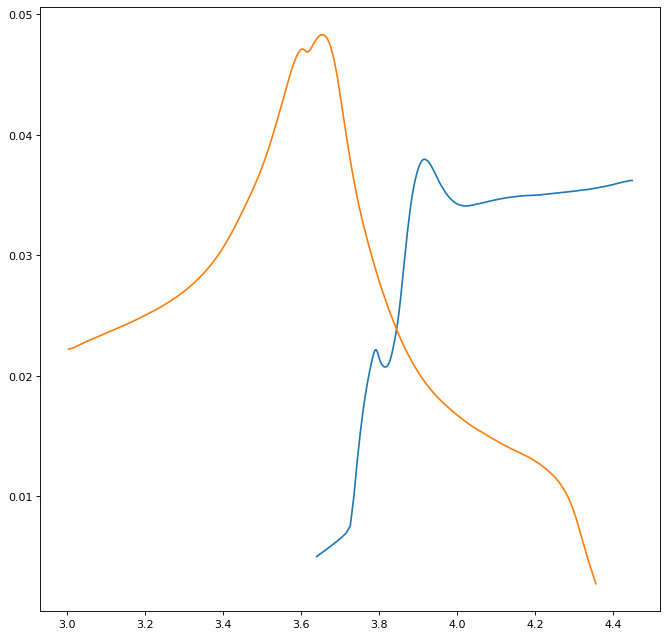

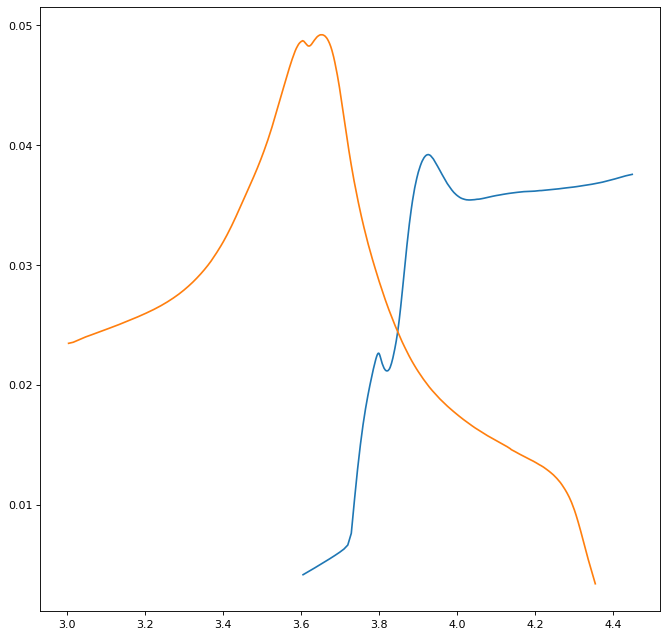

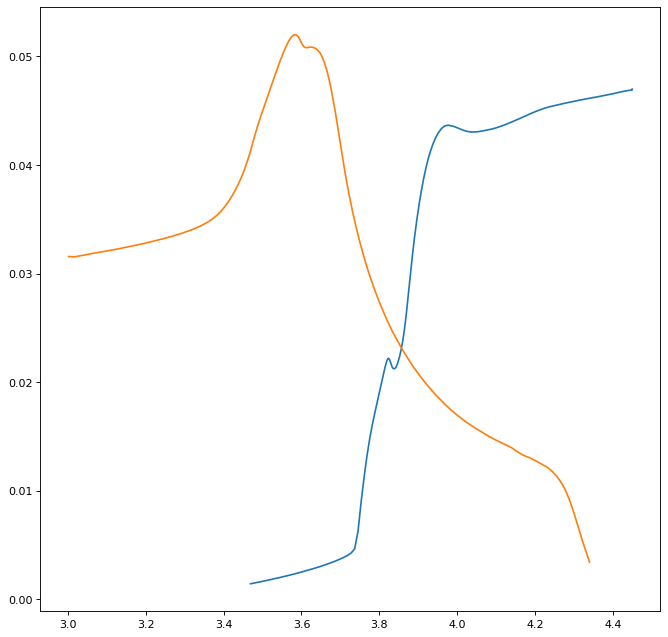

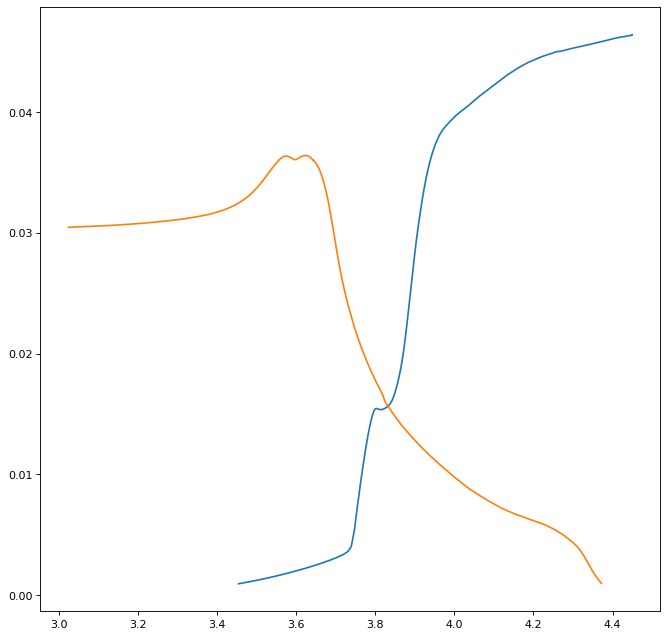

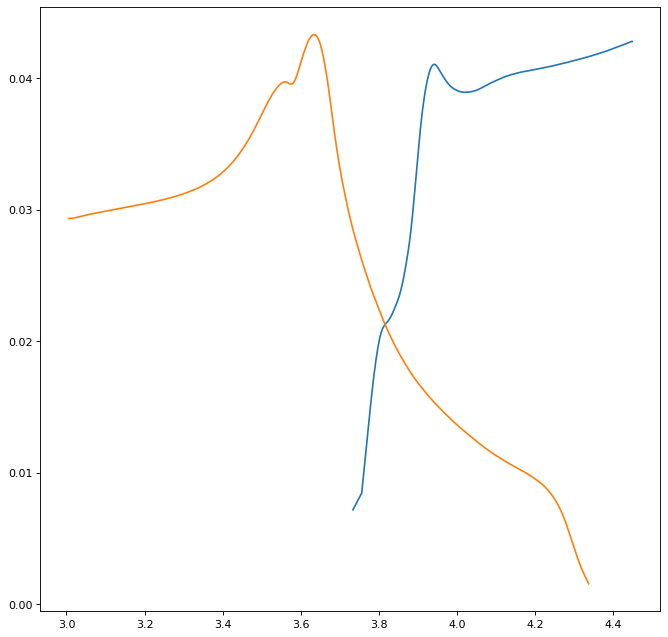

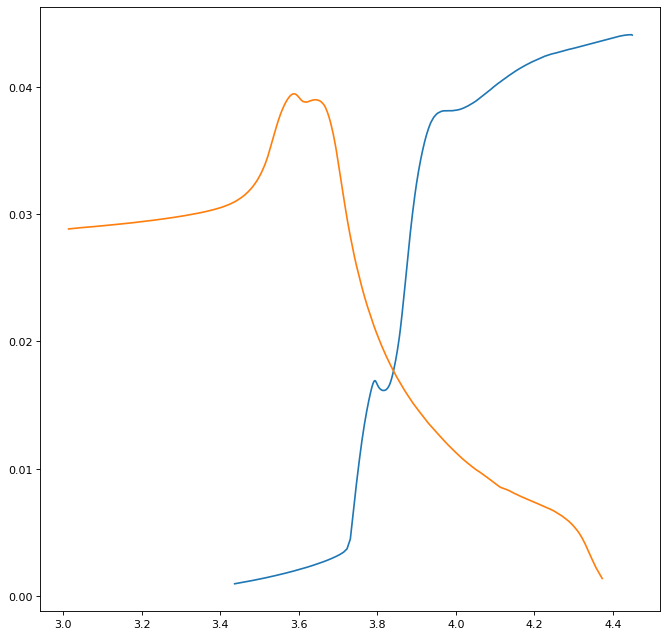

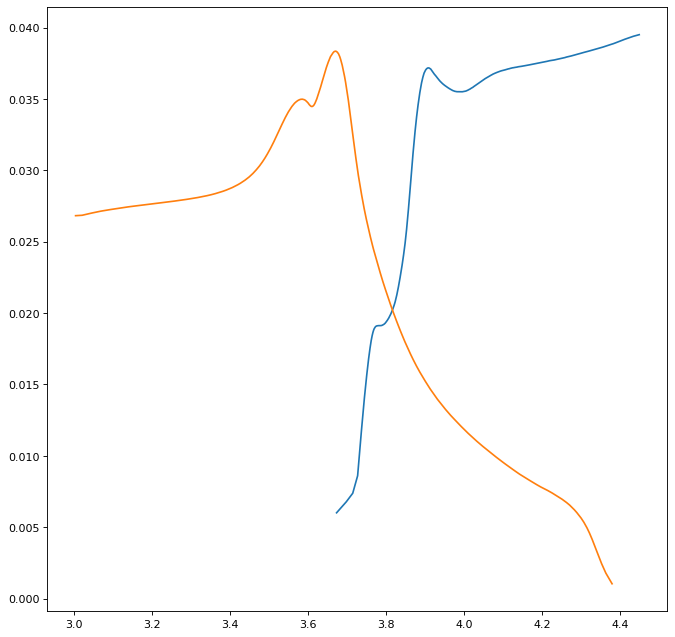

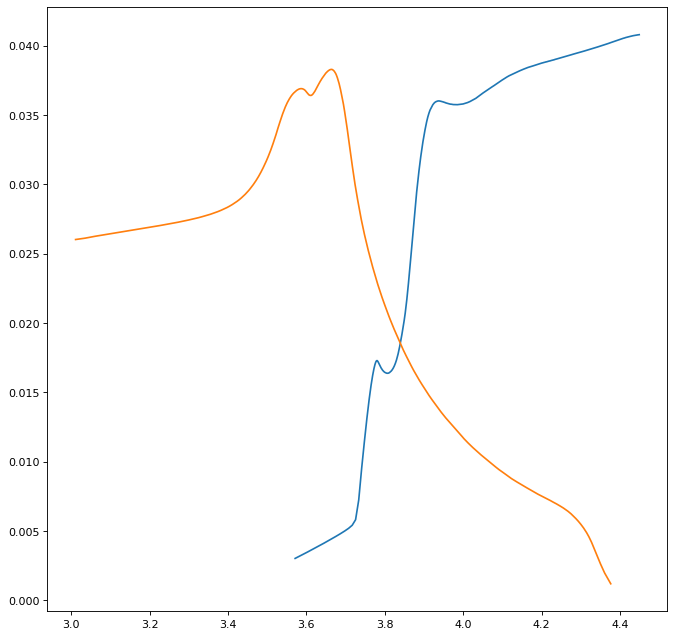

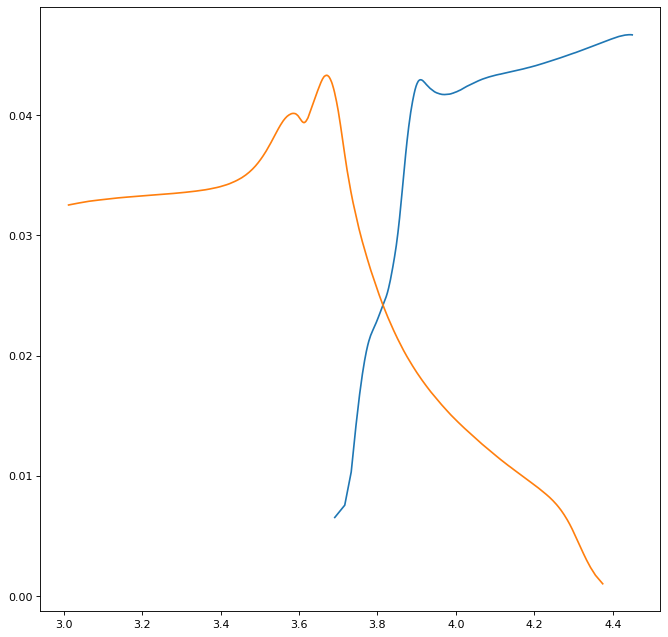

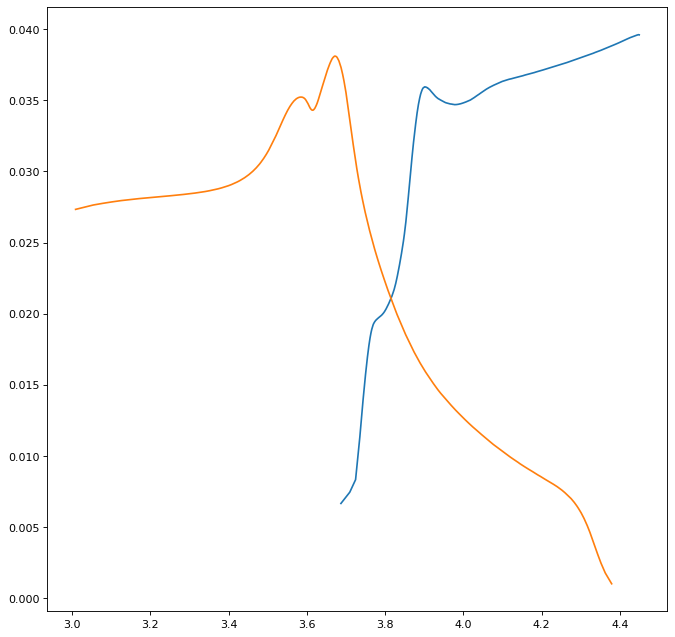

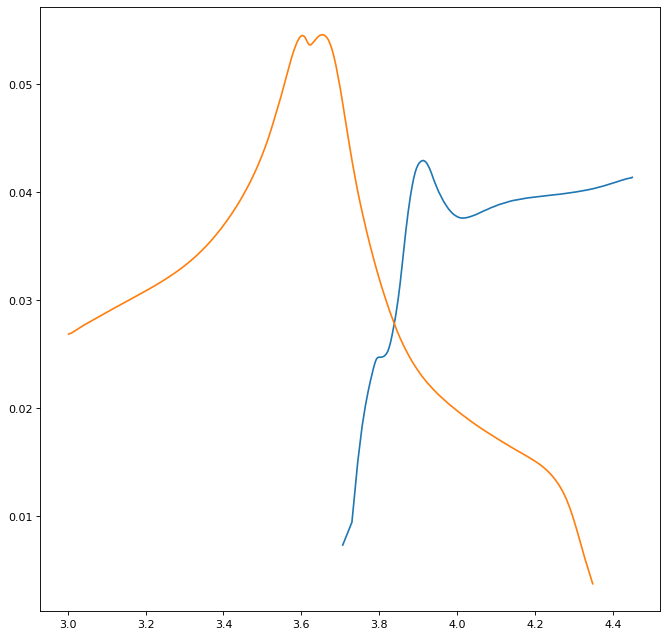

In [12]:
for i in path_list:
    interp(i)